In [1]:
# Problem Statement

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')

import calendar

In [3]:
# Reading & Understanding the data

bike = pd.read_csv('C:/Users/megha/Downloads/Bike Linear Regression Assignment/day.csv')

In [4]:
# View top 10 rows of the dataset
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# View descriptive information of the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# View descriptive information of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Check rows and columns of the dataframe
bike.shape

(730, 16)

In [8]:
# Data quality checks - check % of null/missing values in the column
round(100*(bike.isnull().sum()/len(bike)),2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# No null or missing values in any of the columns in the dataframe
# Checking null or missing values in row-wise in the dataframe
round(100*(bike.isnull().sum(axis=1)/len(bike)),2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [10]:
# No null or missing values in any of the rows in the dataframe

In [11]:
# Checking Data duplication in the dataframe

bike_copy = bike.copy() # copying the dataframe into new one and checking for duplicates and dropping the duplicate rows if any
bike_copy.drop_duplicates(subset=None, inplace=True)

In [12]:
# Checking the shape of duplicated bike dataframe after dropping
print("Duplicate bike dataframe shape:",bike_copy.shape)
print("Original bike dataframe shape:", bike.shape)

Duplicate bike dataframe shape: (730, 16)
Original bike dataframe shape: (730, 16)


In [13]:
# No change in shape hence, no duplicates found in the dataframe

In [14]:
# Data Cleaning
# 1) Checking unique values count in each column

bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [15]:
# Removing irrelevant or redundant columns from the dataframe
# Removing below columns: 
# 1) index - It is just a record index and add no value in this analysis
# 2) dtedate - Contains date, however, we also have two separate columns i.e. 'yr' and 'mnth' which we can use together and get rid of this column
# 3) casual - Contains count of casual users; as the primary objective is to find out the demand for shared bikes and not the nature or type of the users, we can drop this column.
# 4) registered - Contains count of registered users; as the primary objective is to find out the demand for shared bikes and not the nature or type of the users, we can drop this column.

bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
# Creating new dataframe with relevant columns only

bike_updated = bike[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [17]:
# Checking shape of the updated dataframe
bike_updated.shape

(730, 12)

In [18]:
# Converting the integer values to categorical variables 

bike_updated['season'].replace([1,2,3,4],['Spring', 'Summer','Fall', 'Winter'], inplace=True)
bike_updated['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [19]:
bike_updated.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [20]:
# Converting 'mnth' to categorical variable i.e. in Jan, Feb, Mar, and so on. 

bike_updated['mnth']= bike_updated['mnth'].apply(lambda x:calendar.month_abbr[x])
bike_updated['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [21]:
# Converting 'weekday' to object to prepare for dummy variable

bike_updated['weekday']=bike_updated['weekday'].astype('object')

In [22]:
bike_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [23]:
# Converting the integer values to categorical variables 

bike_updated['weathersit'].replace([1,2,3,4],['Clear_Partly_Cloudy', 'Mist_Cloudy','Light_Snow_Rain', 'Heavy_Rain_Snow'], inplace=True)
bike_updated['weathersit'].unique()

array(['Mist_Cloudy', 'Clear_Partly_Cloudy', 'Light_Snow_Rain'],
      dtype=object)

In [24]:
bike_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


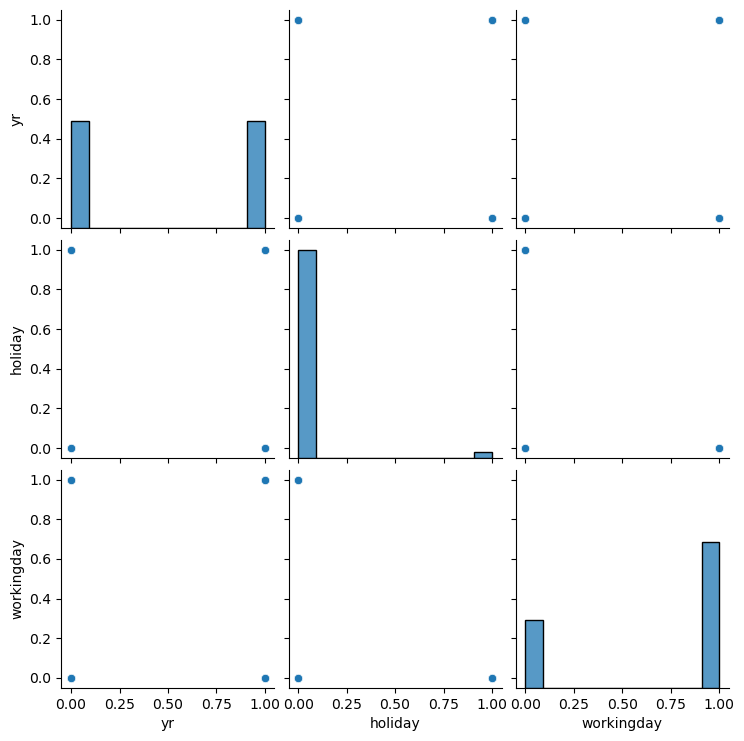

In [25]:
# Univariate Analysis
# 1) Visualization of Numerical variables

sns.pairplot(bike_updated[['yr','holiday','workingday']])
plt.show()

# Observations from above charts:

* 'yr' has 50% - 50% of daily records usage
* Bike usage is significantly high on non-holidays(0) than holidays(1)
* Bike usage is significantly high on working days(1) as compared to non-working(0) days; which is align to 'holiday' too. 

In [26]:
bike_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


ValueError: num must be an integer with 1 <= num <= 4, not 5

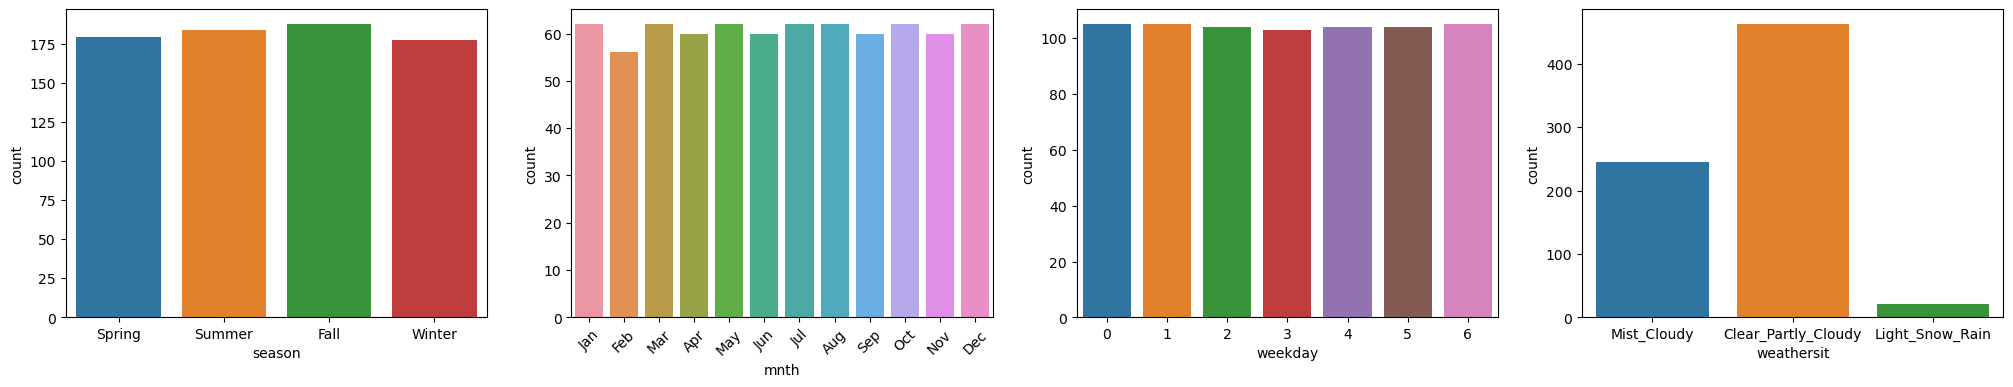

In [27]:
# Univariate Analysis
# 2) Visualization of Categorical variables

plt.figure(figsize = [25,4])
plt.subplot(141)
sns.countplot(data=bike_updated,x='season')
plt.subplot(142)
plt.xticks(rotation=45)
sns.countplot(data=bike_updated,x='mnth')
plt.subplot(143)
sns.countplot(data=bike_updated,x='weekday')
plt.subplot(144)
sns.countplot(data=bike_updated,x='weathersit')
plt.subplot(145)
plt.show()

## Observations from above plots: 
* Bike usage is significantly higher when 'weathersit' is Clear, Few clouds, Partly cloudy, Partly cloudy
* Other variables i.e. 'season', 'mnth' and 'weekday' shows very close values across. 

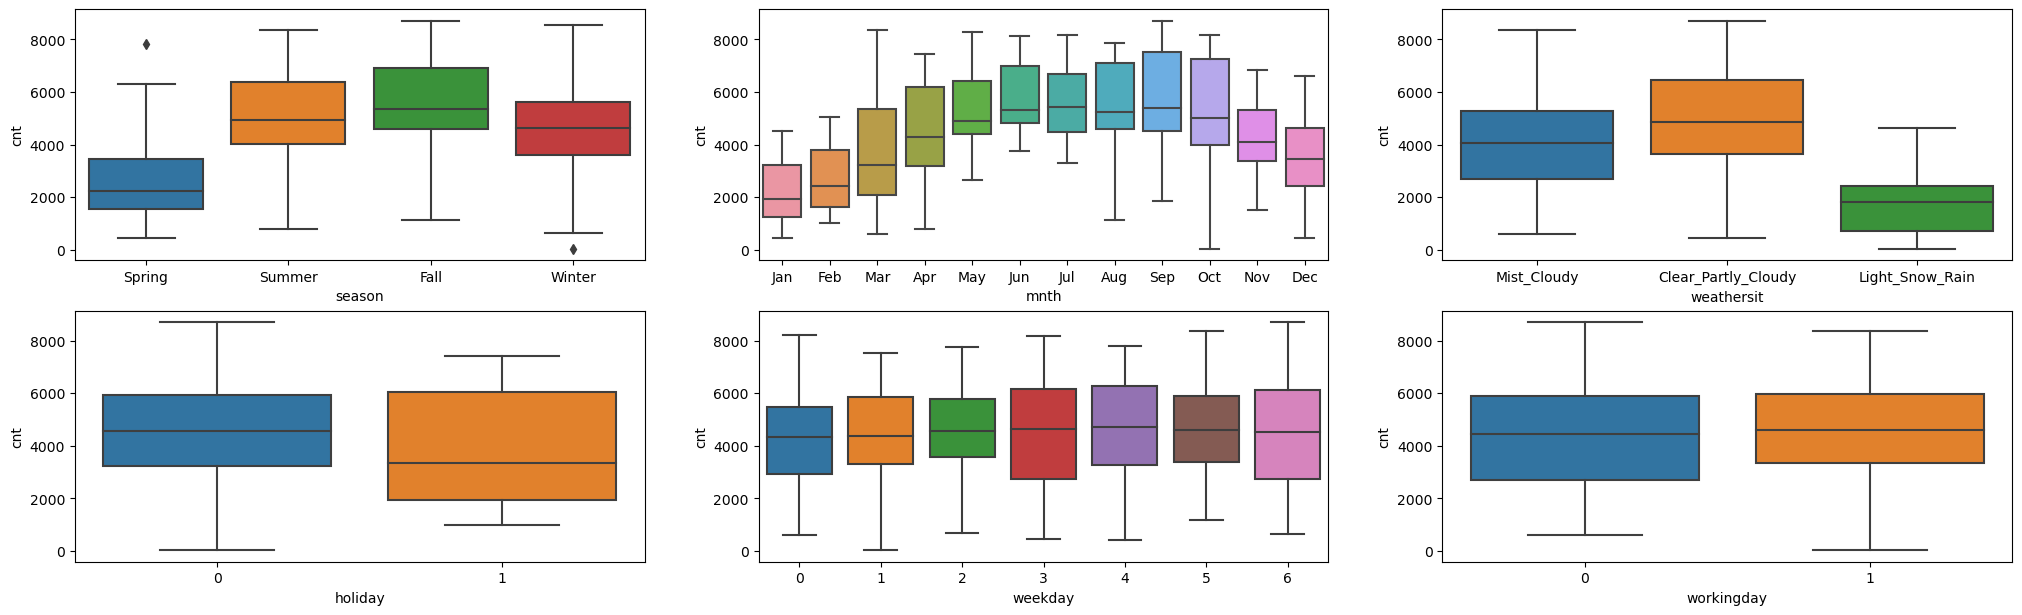

In [29]:
# Visualization of Categorical variables vs 'cnt' i.e. total rental bikes

plt.figure(figsize=(25,15))
plt.subplot(4,3,1) # 2 rows, 3 columns, this is 1st subplot
sns.boxplot(x='season', y='cnt',data=bike_updated)
plt.subplot(4,3,2) # 2 rows, 3 columns
sns.boxplot(x='mnth', y='cnt',data=bike_updated)
plt.subplot(4,3,3) # 2 rows, 3 columns, this is 1st subplot
sns.boxplot(x='weathersit', y='cnt',data=bike_updated)
plt.subplot(4,3,4) # 2 rows, 3 columns, this is 1st subplot
sns.boxplot(x='holiday', y='cnt',data=bike_updated)
plt.subplot(4,3,5) # 2 rows, 3 columns, this is 1st subplot
sns.boxplot(x='weekday', y='cnt',data=bike_updated)
plt.subplot(4,3,6) # 2 rows, 3 columns, this is 1st subplot
sns.boxplot(x='workingday', y='cnt',data=bike_updated)
plt.show()

## Observations from above plots: 

* season - Almost 32% of the bike booking instances observed during Fall with a median over 5k bookings during the course of 2 years (2018 & 2019). Followed by Summer and Winter with 27% and 25% of total bike bookings, thereby indicating good predictor for the dependant variables

* mnth - Almost 10% of the bike booking instances observed during May to Sept (5,6,7,8,9) months with a median of over 4k bookings per month. This indicates month has some trend for bookings and can be a good predictor for the dependant variable. 

* weathersit - Almost 67% of the bike booking instances observed during Clear, Few clouds, Partly cloudy, Partly cloudy (1), followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist(2) by 30%  of the total booking. This indicates 'weathersit' is good predictor as it shows some trends in the dependant variable. 

* holiday - Almost 97.6% of the total bike bookings were observed on non-holidays, indicating some data biasness hence, 'holiday' cannot be a good predictor for the dependant variable.

* weekday - This shows very close trend( ~13-14%) of total bookings on all days of the week. Since, the median bookings ranges from 4k to 5k, this variable shows some or no influence towards the predictor. We will let the model decide if this needs to added or not. 

* workingday - Almost 68% of the bike rental bookings happened on working day (1) with a median of close to 5k bookings over the course of two years i.e. 2018 and 2019. This indicates 'workingday' can be a good predictor for the dependant variable. 

In [30]:
# Correlation Matrix to check correlation between the variables in the dataframe

# Converting categorical variables back to integer to proceed for correlation checks
bike_updated['season'].replace(['Spring', 'Summer','Fall', 'Winter'],[1,2,3,4], inplace=True)
bike_updated['weathersit'].replace(['Clear_Partly_Cloudy', 'Mist_Cloudy','Light_Snow_Rain', 'Heavy_Rain_Snow'],[1,2,3,4], inplace=True)
month_dict = {v: k for k, v in enumerate(calendar.month_abbr)}
bike_updated['mnth'] = bike_updated['mnth'].apply(lambda x: month_dict.get(x, x))
bike_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 68.6+ KB


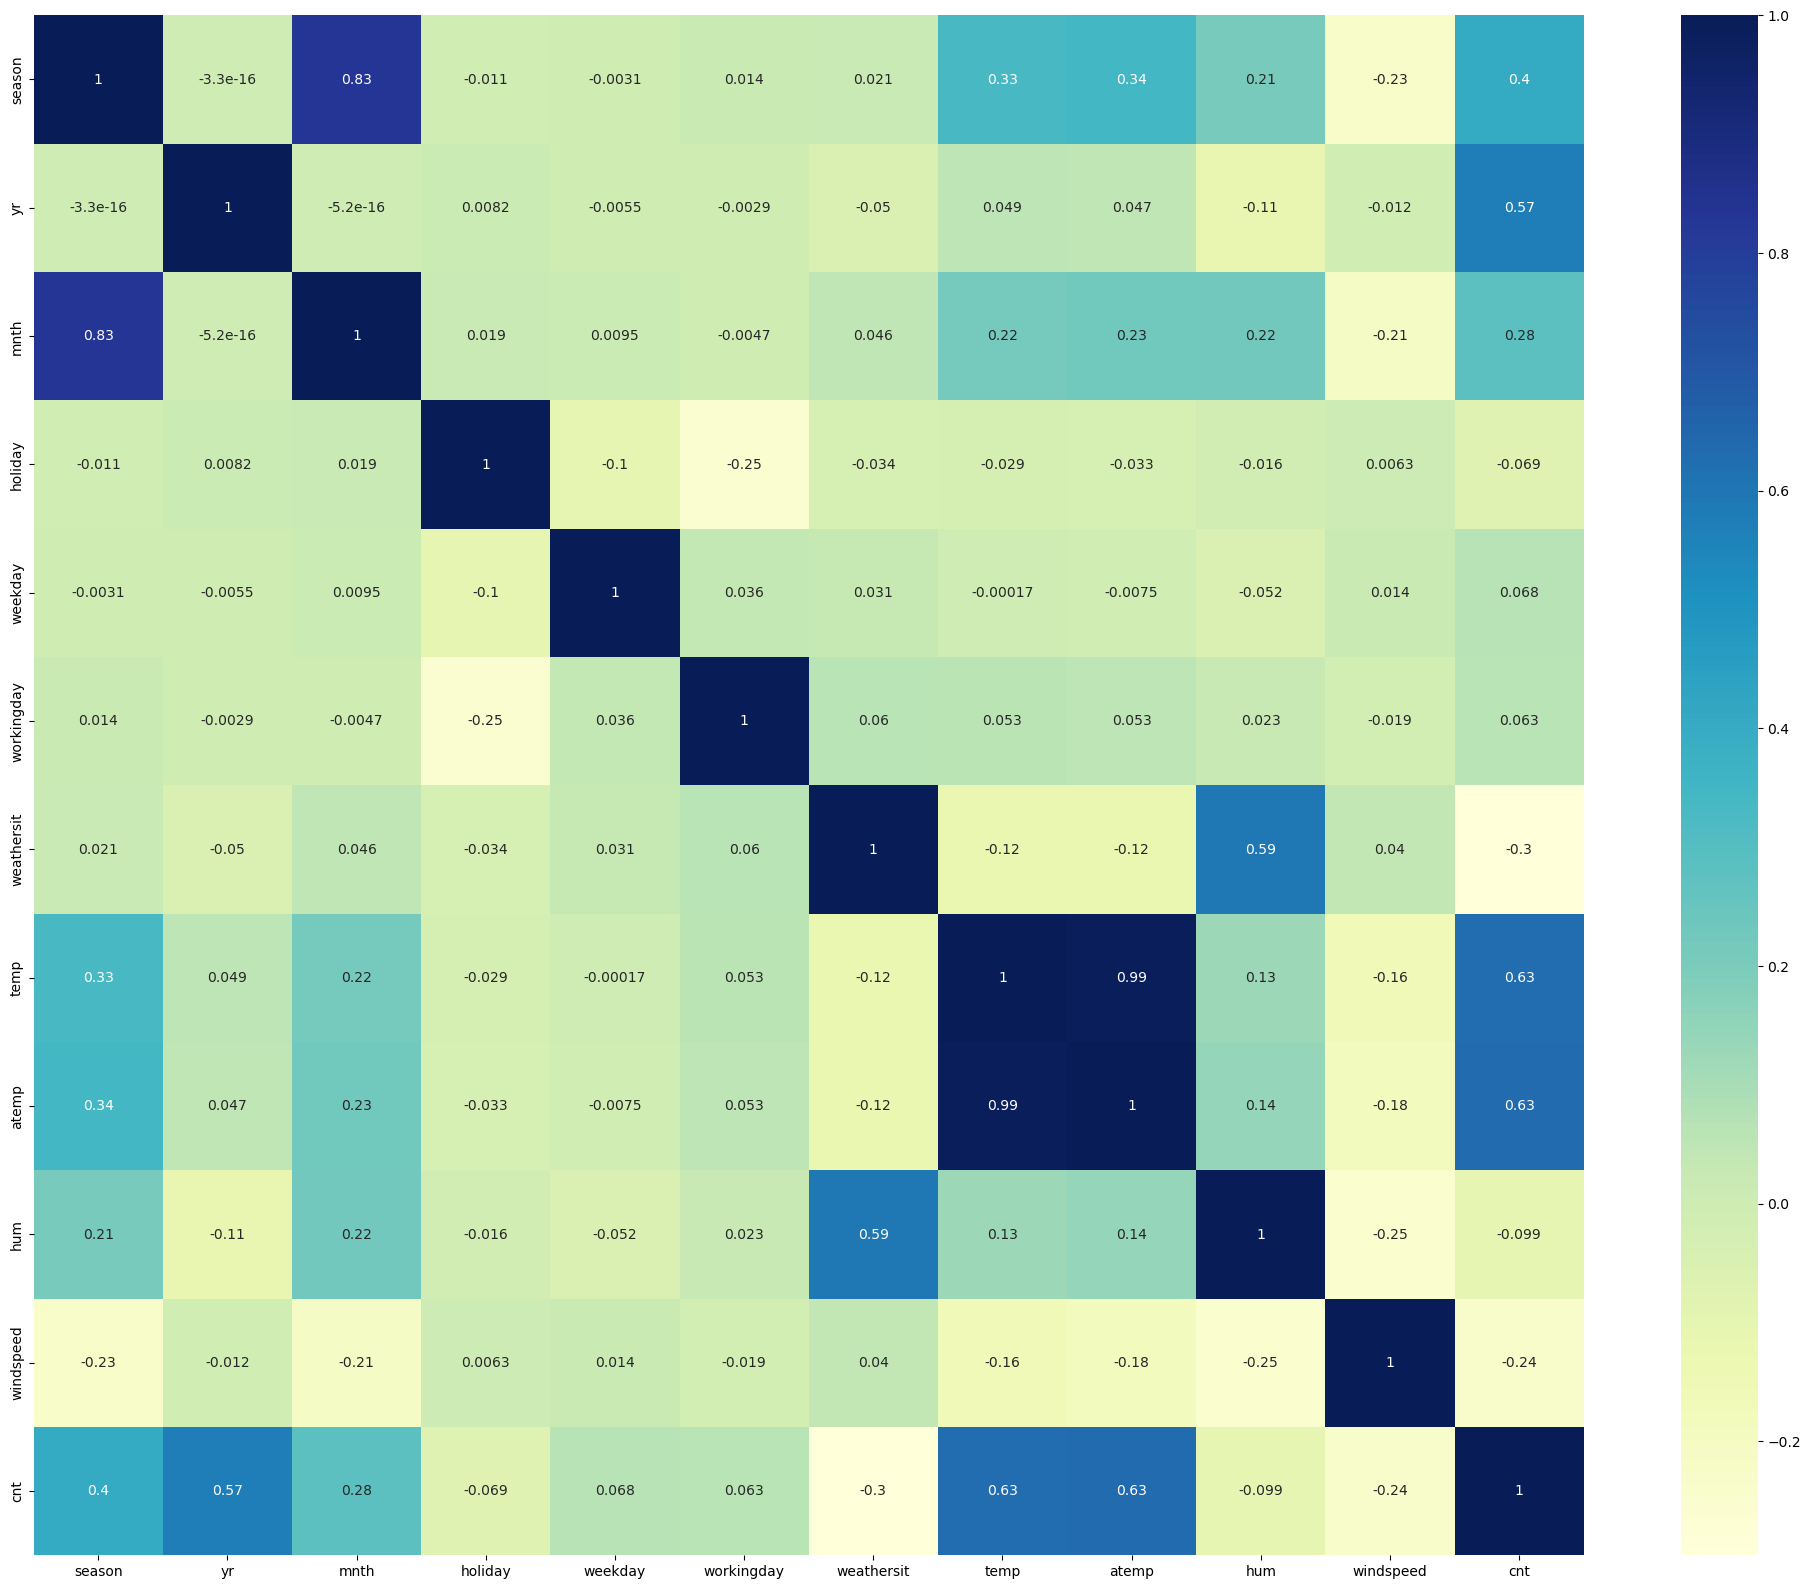

In [31]:
# Checking correlation matrix 

plt.figure(figsize=(25,20))
sns.heatmap(bike_updated.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [32]:
# Creating dummy variables for columns with unique values >2
# Converting the integer values to categorical variables 

bike_updated['season'].replace([1,2,3,4],['Spring', 'Summer','Fall', 'Winter'], inplace=True)
bike_updated['mnth']= bike_updated['mnth'].apply(lambda x:calendar.month_abbr[x])
bike_updated['weathersit'].replace([1,2,3,4],['Clear_Partly_Cloudy', 'Mist_Cloudy','Light_Snow_Rain', 'Heavy_Rain_Snow'], inplace=True)
bike_updated = pd.get_dummies(bike_updated, dtype=int, drop_first=True)
bike_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    int32  
 9   season_Summer               730 non-null    int32  
 10  season_Winter               730 non-null    int32  
 11  mnth_Aug                    730 non-null    int32  
 12  mnth_Dec                    730 non-null    int32  
 13  mnth_Feb                    730 non

In [33]:
bike_updated.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [34]:
bike_updated.shape

(730, 30)

# Data Preparation for Modeling (train-test split, rescaling, etc.)

In [35]:
bike_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    int32  
 9   season_Summer               730 non-null    int32  
 10  season_Winter               730 non-null    int32  
 11  mnth_Aug                    730 non-null    int32  
 12  mnth_Dec                    730 non-null    int32  
 13  mnth_Feb                    730 non

In [36]:
bike_updated.shape

(730, 30)

In [37]:
df_train, df_test = train_test_split(bike_updated, train_size=0.70, test_size=0.30, random_state=100)

In [38]:
# Checking train set and test set shape of the dataframe

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [39]:
# Verifying the info after spliting the data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    int32  
 9   season_Summer               510 non-null    int32  
 10  season_Winter               510 non-null    int32  
 11  mnth_Aug                    510 non-null    int32  
 12  mnth_Dec                    510 non-null    int32  
 13  mnth_Feb                    510 non-nul

In [40]:
df_test.shape

(219, 30)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   cnt                         219 non-null    int64  
 8   season_Spring               219 non-null    int32  
 9   season_Summer               219 non-null    int32  
 10  season_Winter               219 non-null    int32  
 11  mnth_Aug                    219 non-null    int32  
 12  mnth_Dec                    219 non-null    int32  
 13  mnth_Feb                    219 non-nul

In [42]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

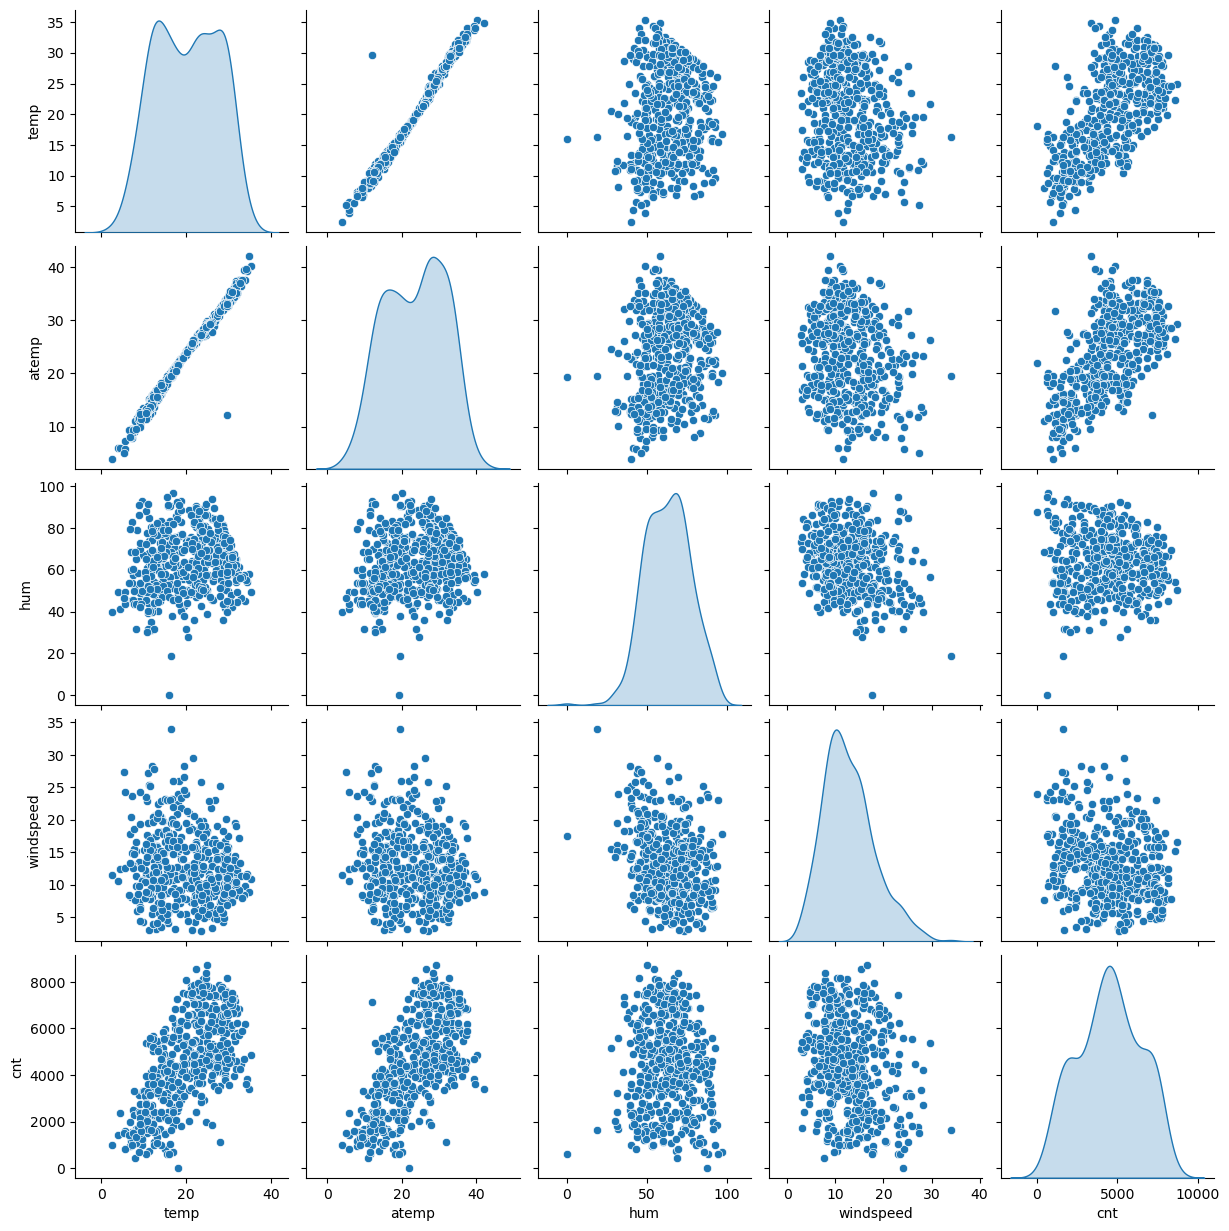

In [43]:
# Visualization of numerical variables i.e. 'temp', 'atemp', 'hum', 'windspeed' and 'cnt'

bike_num = df_train[['temp','atemp','hum','windspeed', 'cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

# Insights from above plots: 

## Above plot shows strong relationship between 'temp', 'atemp' and 'cnt'

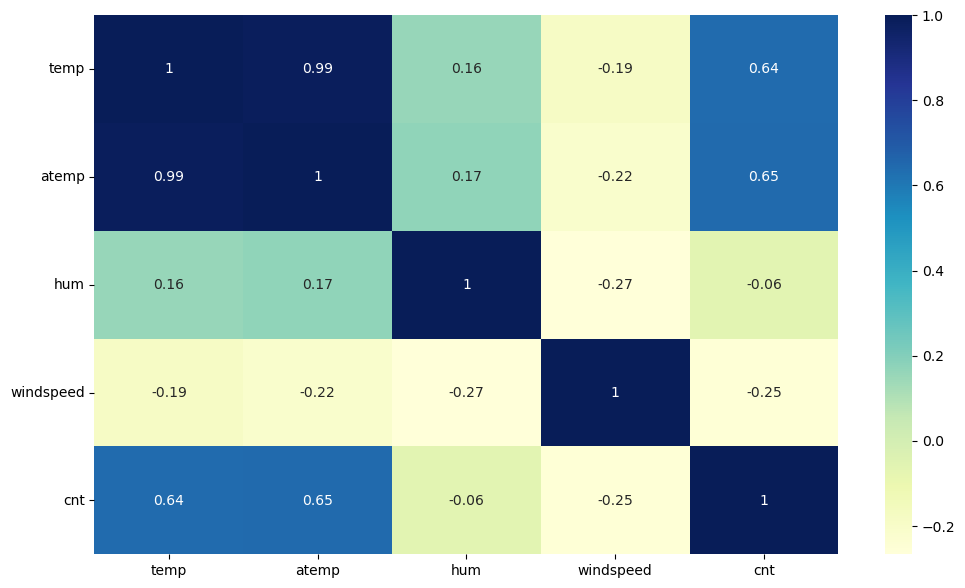

In [44]:
# Creating Correlation Matrix 

plt.figure(figsize=(12,7))
sns.heatmap(bike_num.corr(),annot=True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

## The above heatmap also shows high correlation between 'temp', 'atemp' and 'cnt'

# Rescaling the features

In [45]:
scaler = MinMaxScaler()

In [46]:
# Checking values before scaling

df_train = df_train.astype(int) # Changing data type to int from Bool
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
653,1,0,1,19,23,55,12,7534,0,0,...,1,0,0,1,0,0,0,0,0,0
576,1,0,1,29,33,70,11,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16,20,62,10,4066,1,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,10,11,48,23,1796,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15,18,48,8,4220,0,1,...,0,0,0,0,0,0,0,1,0,1


In [47]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [48]:
# Scaling all numerical variables

num_vars = ['temp','atemp','hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [49]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
653,1,0,1,0.515152,0.512821,0.567010,0.31250,0.864243,0,0,...,1,0,0,1,0,0,0,0,0,0
576,1,0,1,0.818182,0.769231,0.721649,0.28125,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.424242,0.435897,0.639175,0.25000,0.465255,1,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.242424,0.205128,0.494845,0.65625,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.393939,0.384615,0.494845,0.18750,0.482973,0,1,...,0,0,0,0,0,0,0,1,0,1


In [50]:
# Checking dataframe after scaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.533393,0.512066,0.645704,0.322794,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225123,0.207708,0.145907,0.165479,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.525641,0.649485,0.312500,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the Model

In [51]:
y_train = df_train.pop('cnt')
X_train = df_train
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

# Building Model - Using Recursive Feature Elimination (RFE) and LinearRegression

In [52]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
rfe = RFE(estimator=lm, n_features_to_select=15) # Using RFE with output number of the variable equal to 15
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 6),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', False, 2),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [55]:
# Retrieving the columns/features from X_train that were chosen or supported by the Recursive Feature Elimination (RFE) algorithm.
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [56]:
# Retrieving the column names from X_train that were not selected by the Recursive Feature Elimination (rfe) algorithm
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [57]:
# Creating X_test dataframe with RFE selected variables 

X_train_rfe = X_train[col]

# Linear Model using STATS Model

In [58]:
# VIF Check

# Creating dataframe that will contain the names of all the feature variables and VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns 
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,319.99
2,temp,311.01
4,hum,25.31
5,windspeed,4.26
7,season_Winter,2.99
6,season_Spring,2.95
14,weathersit_Mist_Cloudy,2.27
0,yr,2.07
11,mnth_Nov,1.82
9,mnth_Jan,1.75


In [59]:
# Add constant 

X_train_lml = sm.add_constant(X_train_rfe)

# Create fitted model 

lrl = sm.OLS(y_train, X_train_lml).fit()

In [60]:
lrl.params

const                         0.366762
yr                            0.230893
holiday                      -0.089488
temp                          0.314273
atemp                         0.132069
hum                          -0.151957
windspeed                    -0.179655
season_Spring                -0.101811
season_Winter                 0.071242
mnth_Dec                     -0.044473
mnth_Jan                     -0.050673
mnth_Jul                     -0.070820
mnth_Nov                     -0.048623
mnth_Sep                      0.057445
weathersit_Light_Snow_Rain   -0.252346
weathersit_Mist_Cloudy       -0.057173
dtype: float64

In [61]:
print(lrl.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.62e-187
Time:                        23:02:41   Log-Likelihood:                 510.70
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     494   BIC:                            -921.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 2

* Removing 'atemp' variable based on its very high VIF value

In [62]:
X_train_new = X_train_rfe.drop(['atemp'],axis=1)

In [63]:
# VIF Check

# Creating dataframe that will contain the names of all the feature variables and VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns 
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.38
2,temp,16.70
4,windspeed,4.21
6,season_Winter,2.97
5,season_Spring,2.94
13,weathersit_Mist_Cloudy,2.26
0,yr,2.07
10,mnth_Nov,1.82
8,mnth_Jan,1.74
7,mnth_Dec,1.54


In [64]:
# Add constant 

X_train_lm2 = sm.add_constant(X_train_new)

# Create fitted model 

lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [65]:
# Checking parameters

lr2.params

const                         0.371410
yr                            0.230739
holiday                      -0.090563
temp                          0.432641
hum                          -0.149441
windspeed                    -0.184090
season_Spring                -0.101879
season_Winter                 0.072127
mnth_Dec                     -0.045300
mnth_Jan                     -0.052130
mnth_Jul                     -0.070476
mnth_Nov                     -0.049019
mnth_Sep                      0.057376
weathersit_Light_Snow_Rain   -0.254802
weathersit_Mist_Cloudy       -0.057652
dtype: float64

In [66]:
# Print summary of linear Regression Model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.91e-188
Time:                        23:02:42   Log-Likelihood:                 510.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     495   BIC:                            -926.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 3

* Removing 'hum' variable from the model based on its Very high 'VIF' value

In [67]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [68]:
# VIF Check

# Creating dataframe that will contain the names of all the feature variables and VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns 
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.75
3,windspeed,4.19
5,season_Winter,2.54
4,season_Spring,2.38
0,yr,2.07
9,mnth_Nov,1.80
7,mnth_Jan,1.65
12,weathersit_Mist_Cloudy,1.53
6,mnth_Dec,1.46
8,mnth_Jul,1.36


In [69]:
# Add constant 

X_train_lm3 = sm.add_constant(X_train_new)

# Create fitted model 

lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [70]:
lr3.params

const                         0.294039
yr                            0.234328
holiday                      -0.091473
temp                          0.400543
windspeed                    -0.156410
season_Spring                -0.104347
season_Winter                 0.063424
mnth_Dec                     -0.050918
mnth_Jan                     -0.057064
mnth_Jul                     -0.063008
mnth_Nov                     -0.048522
mnth_Sep                      0.054095
weathersit_Light_Snow_Rain   -0.296262
weathersit_Mist_Cloudy       -0.081521
dtype: float64

In [71]:
# Print summary of linear Regression Model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.72e-186
Time:                        23:02:42   Log-Likelihood:                 502.28
No. Observations:                 510   AIC:                            -976.6
Df Residuals:                     496   BIC:                            -917.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 4

* Removing 'windspeed' variable based on its very high VIF value

In [72]:
X_train_new = X_train_new.drop(['windspeed'], axis=1)                    

In [73]:
# VIF Check

# Creating dataframe that will contain the names of all the feature variables and VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns 
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.04
4,season_Winter,2.51
0,yr,2.06
3,season_Spring,1.93
8,mnth_Nov,1.78
6,mnth_Jan,1.65
11,weathersit_Mist_Cloudy,1.52
5,mnth_Dec,1.46
7,mnth_Jul,1.34
9,mnth_Sep,1.20


In [74]:
# Add constant 

X_train_lm4 = sm.add_constant(X_train_new)

# Create fitted model 

lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [75]:
lr4.params

const                         0.222026
yr                            0.233155
holiday                      -0.094398
temp                          0.433142
season_Spring                -0.107603
season_Winter                 0.072850
mnth_Dec                     -0.040132
mnth_Jan                     -0.039293
mnth_Jul                     -0.061506
mnth_Nov                     -0.049249
mnth_Sep                      0.062270
weathersit_Light_Snow_Rain   -0.309417
weathersit_Mist_Cloudy       -0.080210
dtype: float64

In [76]:
# Print summary of linear Regression Model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          7.41e-180
Time:                        23:02:44   Log-Likelihood:                 484.23
No. Observations:                 510   AIC:                            -942.5
Df Residuals:                     497   BIC:                            -887.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 5

* Removing 'mnth_Jan' variable based on its high p-value 0.036 which is close to 0.05.

In [77]:
X_train_new = X_train_new.drop(['mnth_Jan'], axis=1)                    

In [78]:
# VIF Check

# Creating dataframe that will contain the names of all the feature variables and VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns 
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
4,season_Winter,2.49
0,yr,2.05
7,mnth_Nov,1.77
10,weathersit_Mist_Cloudy,1.51
5,mnth_Dec,1.42
6,mnth_Jul,1.33
3,season_Spring,1.29
8,mnth_Sep,1.20
9,weathersit_Light_Snow_Rain,1.07


In [79]:
# Add constant 

X_train_lm5 = sm.add_constant(X_train_new)

# Create fitted model 

lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [80]:
lr5.params

const                         0.210428
yr                            0.232568
holiday                      -0.095405
temp                          0.451648
season_Spring                -0.115964
season_Winter                 0.073266
mnth_Dec                     -0.031890
mnth_Jul                     -0.065379
mnth_Nov                     -0.044803
mnth_Sep                      0.061541
weathersit_Light_Snow_Rain   -0.306564
weathersit_Mist_Cloudy       -0.081065
dtype: float64

In [81]:
# Print summary of linear Regression Model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.46e-180
Time:                        23:02:45   Log-Likelihood:                 481.97
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     498   BIC:                            -889.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 6

* Removing 'holiday' variable from the model based on high VIF value, retaining temp


In [82]:
X_train_new = X_train_new.drop(['holiday'], axis=1)                    

In [83]:
# VIF Check

# Creating dataframe that will contain the names of all the feature variables and VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns 
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.99
3,season_Winter,2.49
0,yr,2.05
6,mnth_Nov,1.75
9,weathersit_Mist_Cloudy,1.50
4,mnth_Dec,1.42
5,mnth_Jul,1.33
2,season_Spring,1.28
7,mnth_Sep,1.20
8,weathersit_Light_Snow_Rain,1.07


In [84]:
# Add constant 

X_train_lm6 = sm.add_constant(X_train_new)

# Create fitted model 

lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [85]:
lr6.params

const                         0.209829
yr                            0.232952
temp                          0.450280
season_Spring                -0.119490
season_Winter                 0.073076
mnth_Dec                     -0.032652
mnth_Jul                     -0.064127
mnth_Nov                     -0.052954
mnth_Sep                      0.057506
weathersit_Light_Snow_Rain   -0.303261
weathersit_Mist_Cloudy       -0.079594
dtype: float64

In [86]:
# Print summary of linear Regression Model
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.25e-178
Time:                        23:02:48   Log-Likelihood:                 475.73
No. Observations:                 510   AIC:                            -929.5
Df Residuals:                     499   BIC:                            -882.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 7

* Removing 'mnth_Dec' variable from the model based on high p-value

In [87]:
X_train_new = X_train_new.drop(['mnth_Dec'], axis=1)

In [88]:
# VIF Check

# Creating dataframe that will contain the names of all the feature variables and VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns 
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.98
0,yr,2.05
3,season_Winter,1.89
5,mnth_Nov,1.55
8,weathersit_Mist_Cloudy,1.50
4,mnth_Jul,1.33
2,season_Spring,1.23
6,mnth_Sep,1.19
7,weathersit_Light_Snow_Rain,1.06


In [89]:
# Add constant 

X_train_lm7 = sm.add_constant(X_train_new)

# Create fitted model 

lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [90]:
lr7.params

const                         0.201156
yr                            0.233174
temp                          0.462405
season_Spring                -0.118110
season_Winter                 0.063493
mnth_Jul                     -0.066116
mnth_Nov                     -0.039860
mnth_Sep                      0.059420
weathersit_Light_Snow_Rain   -0.299708
weathersit_Mist_Cloudy       -0.079143
dtype: float64

In [91]:
# Print summary of linear Regression Model
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.03e-179
Time:                        23:02:50   Log-Likelihood:                 474.02
No. Observations:                 510   AIC:                            -928.0
Df Residuals:                     500   BIC:                            -885.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 8

* Removing 'mnth_Nov' variable from the model based on high p-value

In [92]:
X_train_new = X_train_new.drop(['mnth_Nov'], axis=1)

In [93]:
# VIF Check

# Creating dataframe that will contain the names of all the feature variables and VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns 
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.98
0,yr,2.05
7,weathersit_Mist_Cloudy,1.50
4,mnth_Jul,1.33
3,season_Winter,1.32
2,season_Spring,1.23
5,mnth_Sep,1.18
6,weathersit_Light_Snow_Rain,1.06


In [94]:
# Add constant 

X_train_lm8 = sm.add_constant(X_train_new)

# Create fitted model 

lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [95]:
lr8.params

const                         0.194629
yr                            0.233121
temp                          0.471143
season_Spring                -0.114481
season_Winter                 0.051687
mnth_Jul                     -0.067248
mnth_Sep                      0.062017
weathersit_Light_Snow_Rain   -0.297208
weathersit_Mist_Cloudy       -0.078220
dtype: float64

In [96]:
# Print summary of linear Regression Model
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.49e-179
Time:                        23:02:53   Log-Likelihood:                 471.60
No. Observations:                 510   AIC:                            -925.2
Df Residuals:                     501   BIC:                            -887.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

* This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model. 

# Model 8 Interpretation

## Hypothesis Testing: 
* H0:B1=B2=...=Bn=0
* H1: at least one Bi!=0

Model 8 coefficient values are: 
    
const = 0.1946
yr = 0.2331
temp = 0.4711
season_Spring = -0.1145
season_Winter = 0.0517
mnth_Jul = -0.0672
mnth_Sep = 0.062
weathersit_Light_Snow_Rain = -0.2972
weathersit_Mist_Cloudy = -0.0782

* From lr8 model summary, it is evident that all our coefficients are not equal to zero i.e. We reject the NULL hypothesis.

F-statistic: 279.6
Prob (F-statistic): 2.49e-179

The F-statistic value is 279.6 i.e. greater than 1 and the p-value of all the variables is '0.000', which states that overall model is significant. 

The equation of best fitted surface based on Model lr8: 

cnt = 0.1946 + (yr x 0.2331) + (temp x 0.4711) - (season_Spring x 0.1145) + (season_Winter x 0.0517) - (mnth_Jul x 0.0672) + (mnth_Sep x 0.062) - (weathersit_Light_Snow_Rain x 0.2972) - (weathersit_Mist_Cloudy x 0.0782)

Interpretation of coefficients: 

This is similar to equation: Y = BO + B1x1 + B2x2 + ...Bn* Xn
where: 

* If positive sign: A coefficient value of (B1,B2,..Bn) indicated that a unit increase a Independant variable (X1,X2,X3...Xn), increases the bike hire numbers by (B1,B2,..Bn) units. 
* If negative sign: A coefficient value of (B1,B2,..Bn) indicated that a unit increase a Independant variable (X1,X2,X3...Xn), decreases the bike hire numbers by (B1,B2,..Bn) units. 
* const: The constant value of 0.1946 indicating that, in the absence of all other predicator variables
(i.e. when x1, x2, x3,...xn = 0.), the bike rental can still increase by 0.1946 units. 

# Assumptions 

Error terms are normally distributed with mean zero(not X,Y)

## Residual Analysis of Training data

In [97]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

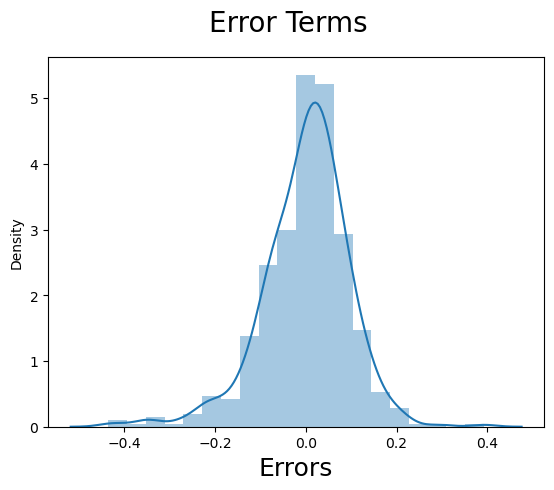

In [98]:
res = y_train - y_train_pred

# Plot the histogram of the error terms 

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading
plt.xlabel('Errors', fontsize=18) # X-Label

* From the above histogram, we could see that the Residuals are normally distributed. Hence, our assumption for Linear Regression is valid. 

# There is linear relationship between X and Y 

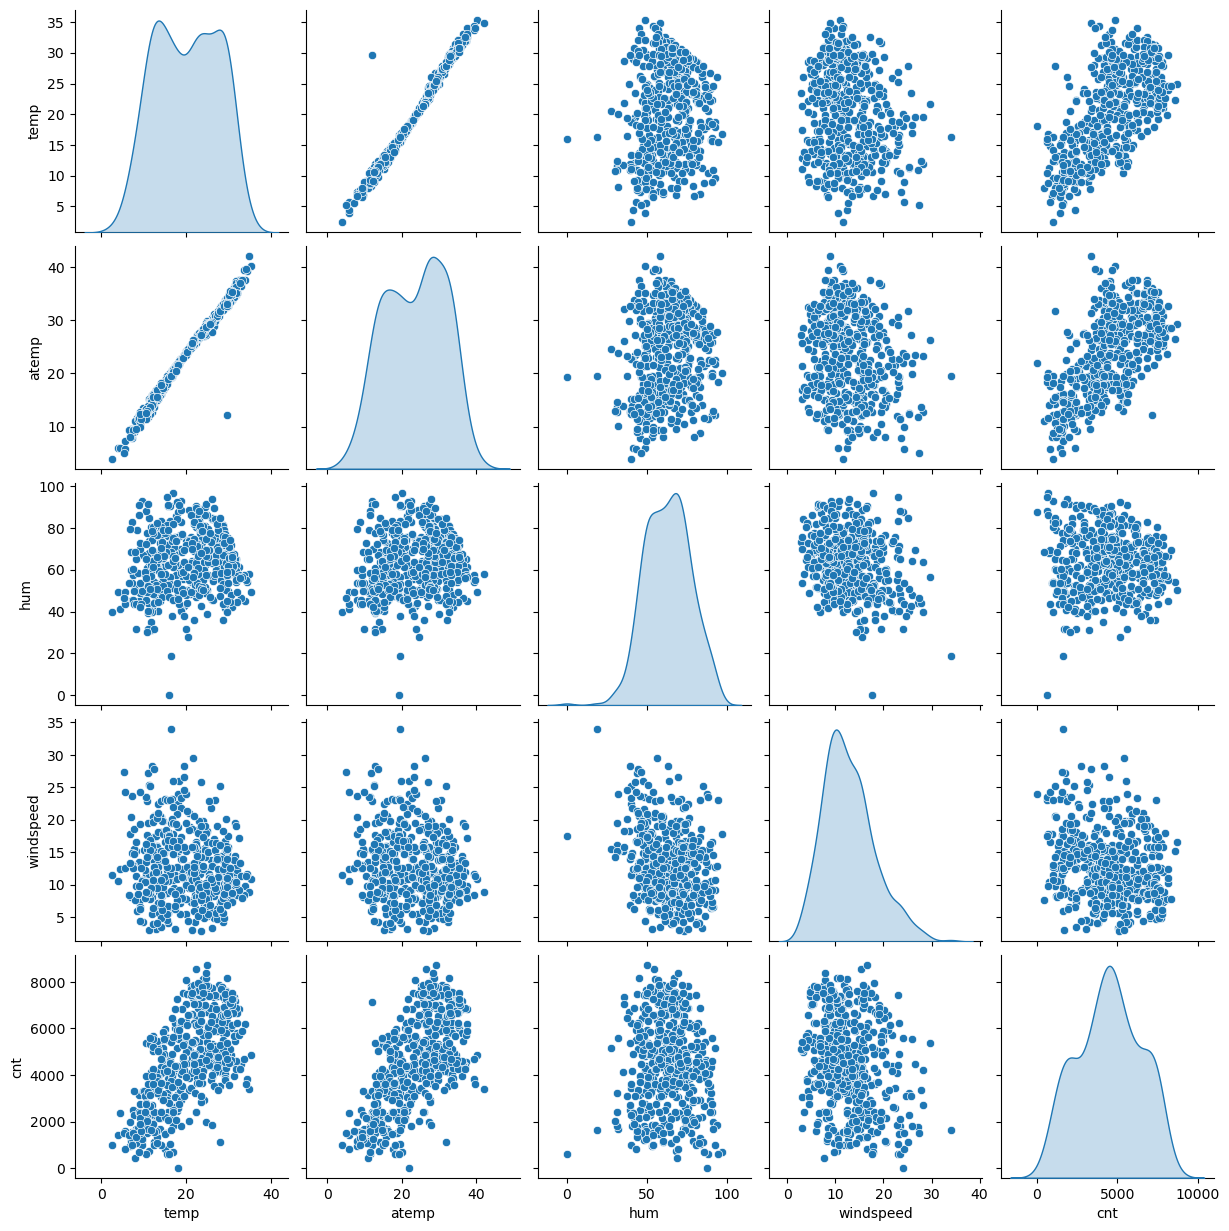

In [99]:
bike_updated = bike_updated [['temp','atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

* By looking at above plot, we could see there is linear relation between temp and atemp variable with the predictor 'cnt'

# No Multicollinearity between the predictor variables. 

In [100]:
# VIF Check of the feature variables 

# Create dataframe that will contain the names of all feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns 
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.98
0,yr,2.05
7,weathersit_Mist_Cloudy,1.50
4,mnth_Jul,1.33
3,season_Winter,1.32
2,season_Spring,1.23
5,mnth_Sep,1.18
6,weathersit_Light_Snow_Rain,1.06


* From VIF calculation, we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

# Making predictions using Final Model - Lr8

In [102]:
# Applying scaling on the test sets

# Apply scaler() to all numeric variables in the test dataset, Note: we will only use the scaler.transform
# as we want to use the metrics that the model learned from the training data to be applied on the test data
# In other words, we want to prevent the information leak from train to test dataset

num_vars = ['temp','atemp', 'hum','windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [103]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
184,0,1,0,0.842223,0.776176,0.657646,0.108097,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911591,0.847404,0.610395,0.175794,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.523333,0.509033,0.838059,0.351566,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.891920,0.801260,0.437286,0.356790,0.547400,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.827727,0.748644,0.314433,0.549476,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [104]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.570174,0.545021,0.638782,0.331254,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233018,0.212811,0.149038,0.155777,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.059315,0.049794,0.262028,-0.015617,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.366477,0.361167,0.527492,0.219415,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.569924,0.560850,0.628007,0.317725,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.769747,0.721942,0.744248,0.418613,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.994420,0.982527,1.002577,0.812495,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
# Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   season_Spring               219 non-null    int32  
 8   season_Summer               219 non-null    int32  
 9   season_Winter               219 non-null    int32  
 10  mnth_Aug                    219 non-null    int32  
 11  mnth_Dec                    219 non-null    int32  
 12  mnth_Feb                    219 non-null    int32  
 13  mnth_Jan                    219 non-nul

In [107]:
# Selecting the variables that were part of the final model lr8: 

col1 = X_train_new.columns
X_test = X_test[col1]

# Adding constant variable to test dataframe

X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   season_Spring               219 non-null    int32  
 4   season_Winter               219 non-null    int32  
 5   mnth_Jul                    219 non-null    int32  
 6   mnth_Sep                    219 non-null    int32  
 7   weathersit_Light_Snow_Rain  219 non-null    int32  
 8   weathersit_Mist_Cloudy      219 non-null    int32  
dtypes: float64(2), int32(6), int64(1)
memory usage: 12.0 KB


# Model Evaluation

AttributeError: 'Figure' object has no attribute 'subptile'

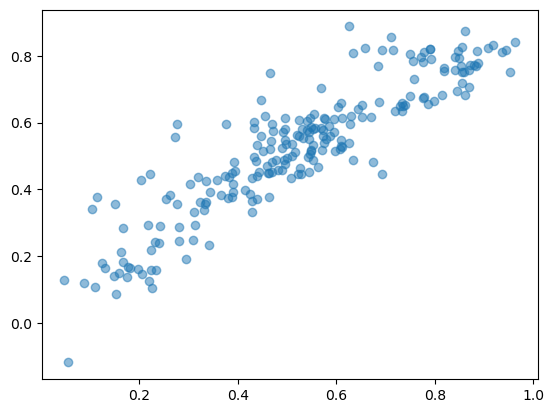

In [119]:
y_pred = lr8.predict(X_test_lm8)

# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha = 0.5)
fig.subptile('y_test vs y_pred', fontsize = 20) # Plot heading
plt.xlabel('y_test', fontsize = 18) # x-label 
plt.ylabel('y_pred', fontsize = 16) # y-label
plt.show()

# R^2 Value for TEST

In [131]:
r2_score(y_test, y_pred)

0.8093665671254426

In [ ]:
y_pred = lr8.predict(X_train_lm8)

## Adjusted R^2 value for Test

In [122]:
# We already have the value of R^2 (calculated in above step)

r2 = 0.8093665671254426

In [123]:
# Shape of X_test
X_test.shape

(219, 8)

In [124]:
# n is number of rows in X

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared using below formula: 

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8021043411111738

# Final Result Comparison

* Train R-Square = 0.817
* Train Adjusted R-Square = 0.814

* Test R-Square = 0.809
* Test Adjusted R-Square = 0.802

The model demonstrates strong performance on both training and test sets. 

# Final Report

As per our final Model, the top 3 predictor variables that influences the bike booking are: 

* Temperature (temp) - A coefficient value of 0.4711 indicated that a unit increase in temp variables increases the bike hire numbers by 0.4711 units. 
* Weather condition 3 (weathersit_Light_Snow_Rain) - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - A coefficient value of -0.2972 indicated that w.r.t Weathersit_3, a unit increase in Weathersit_3 variable decreases the bike hire numbers by 0.2972 units. 
* year (yr) - A coefficient value of 0.2331 indicated that a unit decrease in yr variable increases the bike hire numbers by 0.2331 units. 

Hence, we can consider these variables as most important variables while planning to achieve maximum Bike bookings. 